# 실습에 주로 활용할 데이터 셋

- sklearn.dataset 에서 제공해주는 다양한 샘플 데이터 활용  
[참고 : sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

## iris 데이터셋
꽃 종류 분류하기  
[iris 데이터 셋](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
# iris 데이터셋 로드
iris = load_iris()

In [17]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### iris feature 설명
- `DESCR`: 데이터셋의 정보를 보여줍니다.
- `data`: feature data.
- `feature_names`: feature data의 컬럼 이름
- `target`: label data (수치형)
- `target_names`: label의 이름 (문자형)

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = iris['data']
data[-5:]

array([[6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [59]:
feature_names = iris['feature_names']
cols_list = []
for col in feature_names:
    cols = col.split("(")
    print(cols[0])
    cols_list.append(cols[0].strip())
print(cols_list)

sepal length 
sepal width 
petal length 
petal width 
['sepal length', 'sepal width', 'petal length', 'petal width']


- petal: 꽃잎
- sepal: 꽃 받침

In [52]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# 타겟 값의 레이블(이름)
iris['target_names']   

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터프레임 만들기

In [55]:
cols_list.append("target_test")

In [60]:
# [문제]feature들로 구성된 데이터 프레임 만들기
df_iris = pd.DataFrame(data, columns=cols_list)

In [27]:
df_iris.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### [문제] target 숫자에 대응하는 label 추가하기
df_iris["target_label"]

In [81]:
df_iris = df_iris.drop("target", axis=1)
df_iris

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [103]:
iris["target"]
df_iris["target"] = target

In [104]:
# 칼럼이 존재해야 apply 가능
df_iris["target_names"] = df_iris["target"].apply(lambda x: iris["target_names"][x])
df_iris

,sepal length,sepal width,petal length,petal width,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### 시각화

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

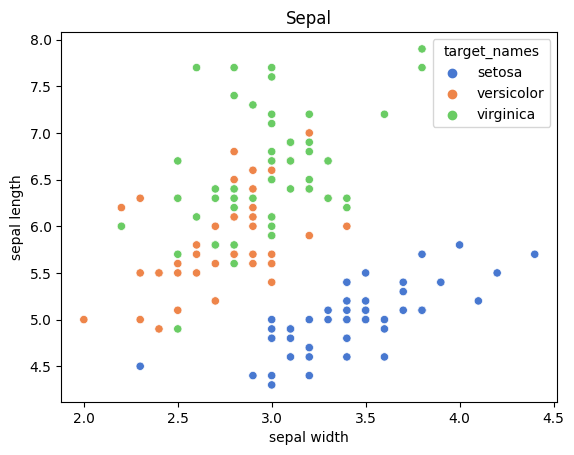

In [105]:
# 꽃받침 정보에 따른 분류
#sns.scatterplot(data=df_iris, x='sepal width', y='sepal length', hue='target')
#sns.scatterplot(data=df_iris, x='sepal width', y='sepal length', hue='target', palette='brg')
sns.scatterplot(data=df_iris, x='sepal width', y='sepal length', hue='target_names', palette='muted')
plt.title('Sepal')
plt.show()
#'petal length (cm)', 'petal width (cm)',

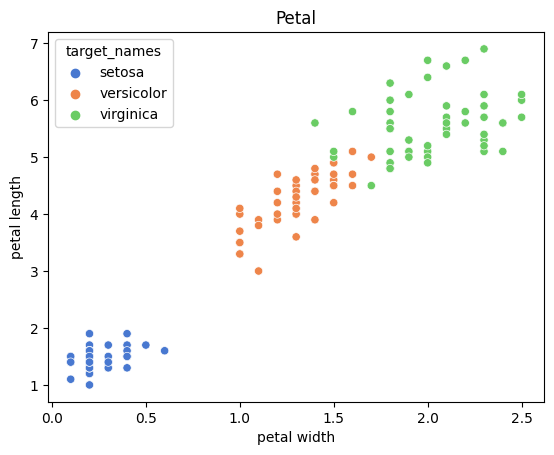

In [106]:
# 꽃잎 정보에 따른 분류
sns.scatterplot(data=df_iris, x='petal width', y='petal length', hue='target_names', palette='muted')
plt.title('Petal')
plt.show()

### 데이터 불균형 확인

In [93]:
from sklearn.model_selection import train_test_split

In [111]:
X = df_iris.drop(['target', "target_names"], axis=1)

In [149]:
y = df_iris['target']

In [363]:
print(X.shape, y.shape)

(150, 4) (150,)


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [113]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [114]:
X_test.shape, y_test.shape

((38, 4), (38,))

<Axes: ylabel='count'>

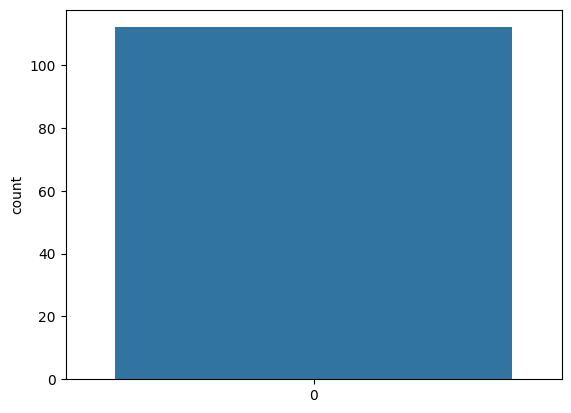

In [151]:
sns.countplot(y_train)

#### label의 클래스의 분포를 균등하게 배분함. 샘플을 균등하게 하지 않으면 편향된 예측을 할 수 있음.
stratify = feature column

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

<Axes: xlabel='target', ylabel='count'>

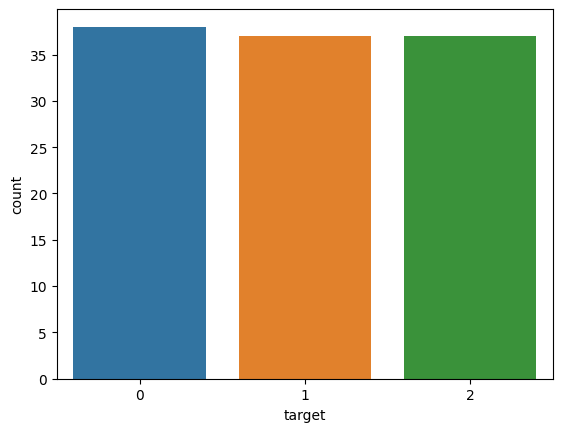

In [189]:
sns.countplot(x = y_train)

In [116]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [117]:
X_test.shape, y_test.shape

((38, 4), (38,))

In [118]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## 지도학습 알고리즘 이해 및 실습

### 의사 결정 나무 (Decision Tree)
- 스무고개 처럼 질문에 True or False로 판별하여, 바이너리 트리 형태로 가지치기를 하여 결정함
- 데이터 균일도에 따른 규칙기반 결정으로 다음 노드 결정

### 장점
- 매우 쉽고, 유연함.
- 데이터 스케일링이나 정규화등의 사전 가공의 영향이 매우 적음.

### 단점
- depth가 깊어지면 과적합(overfitting)에 빠질 수 있음.

앙상블에서 결정트리의 단점을 보완하여 약한 학습기로 가중치를 계속 업데이터하면서 예측성능을 향상시킬 수 학습기로 사용함.  
[Decision Tree scikit-learning 문서 참조](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/CART_tree_titanic_survivors_KOR.png/350px-CART_tree_titanic_survivors_KOR.png" width=600 height=600>

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
model_dtc = DecisionTreeClassifier(random_state=0)
model_dtc

DecisionTreeClassifier(random_state=0)

In [162]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [163]:
y_pred = model_dtc.predict(X_test)
y_pred

array([1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2])

In [164]:
(y_pred == y_test).mean()

0.9736842105263158

In [165]:
y_pred[:5]

array([1, 1, 2, 2, 2])

In [166]:
y_test[:5].values

array([1, 1, 2, 2, 2])

In [225]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### Decision Tree Graph display(결정트리 시각화)

In [168]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

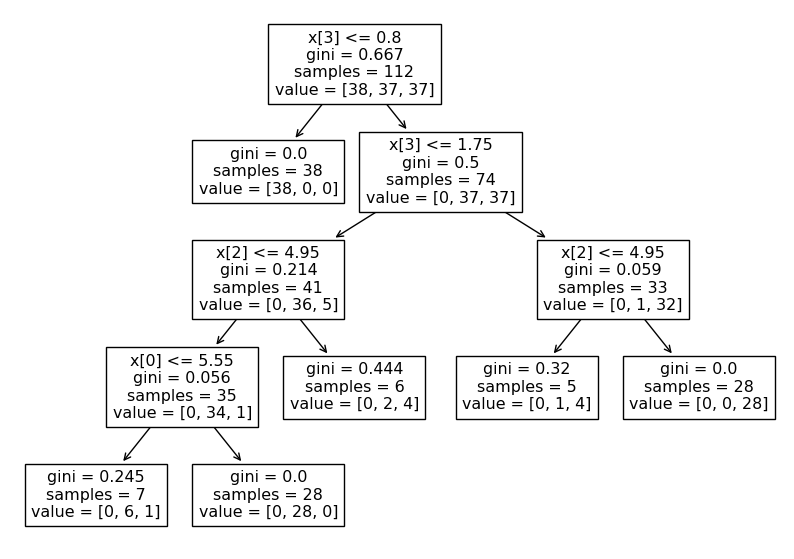

In [226]:
plt.figure(figsize=(10, 7))
plot_tree(model_dtc)
plt.show()

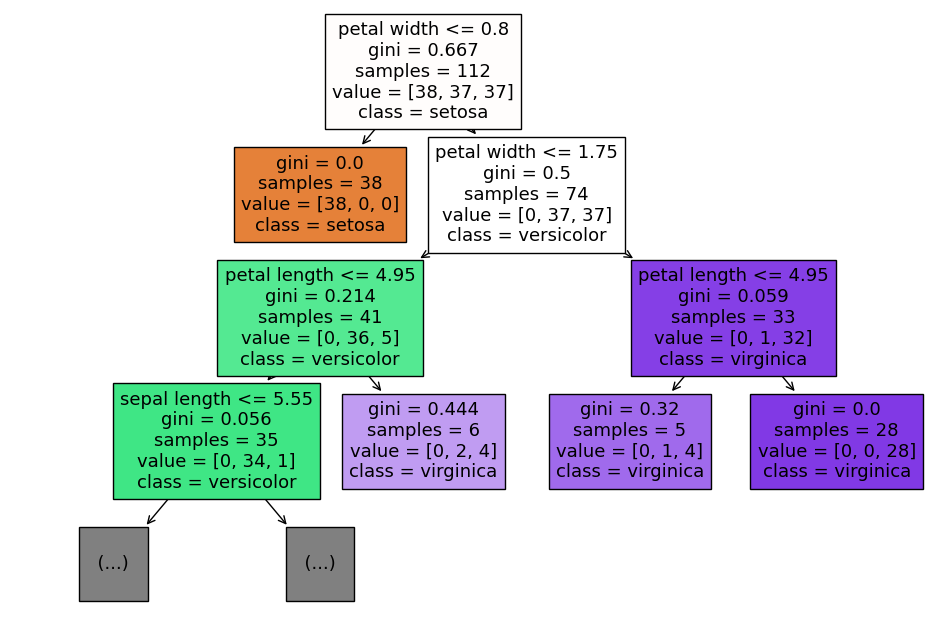

In [222]:
plt.figure(figsize=(12,8))
plot_tree(model_dtc, max_depth=3, filled=True, feature_names=cols_list, class_names=target_names)
plt.show()

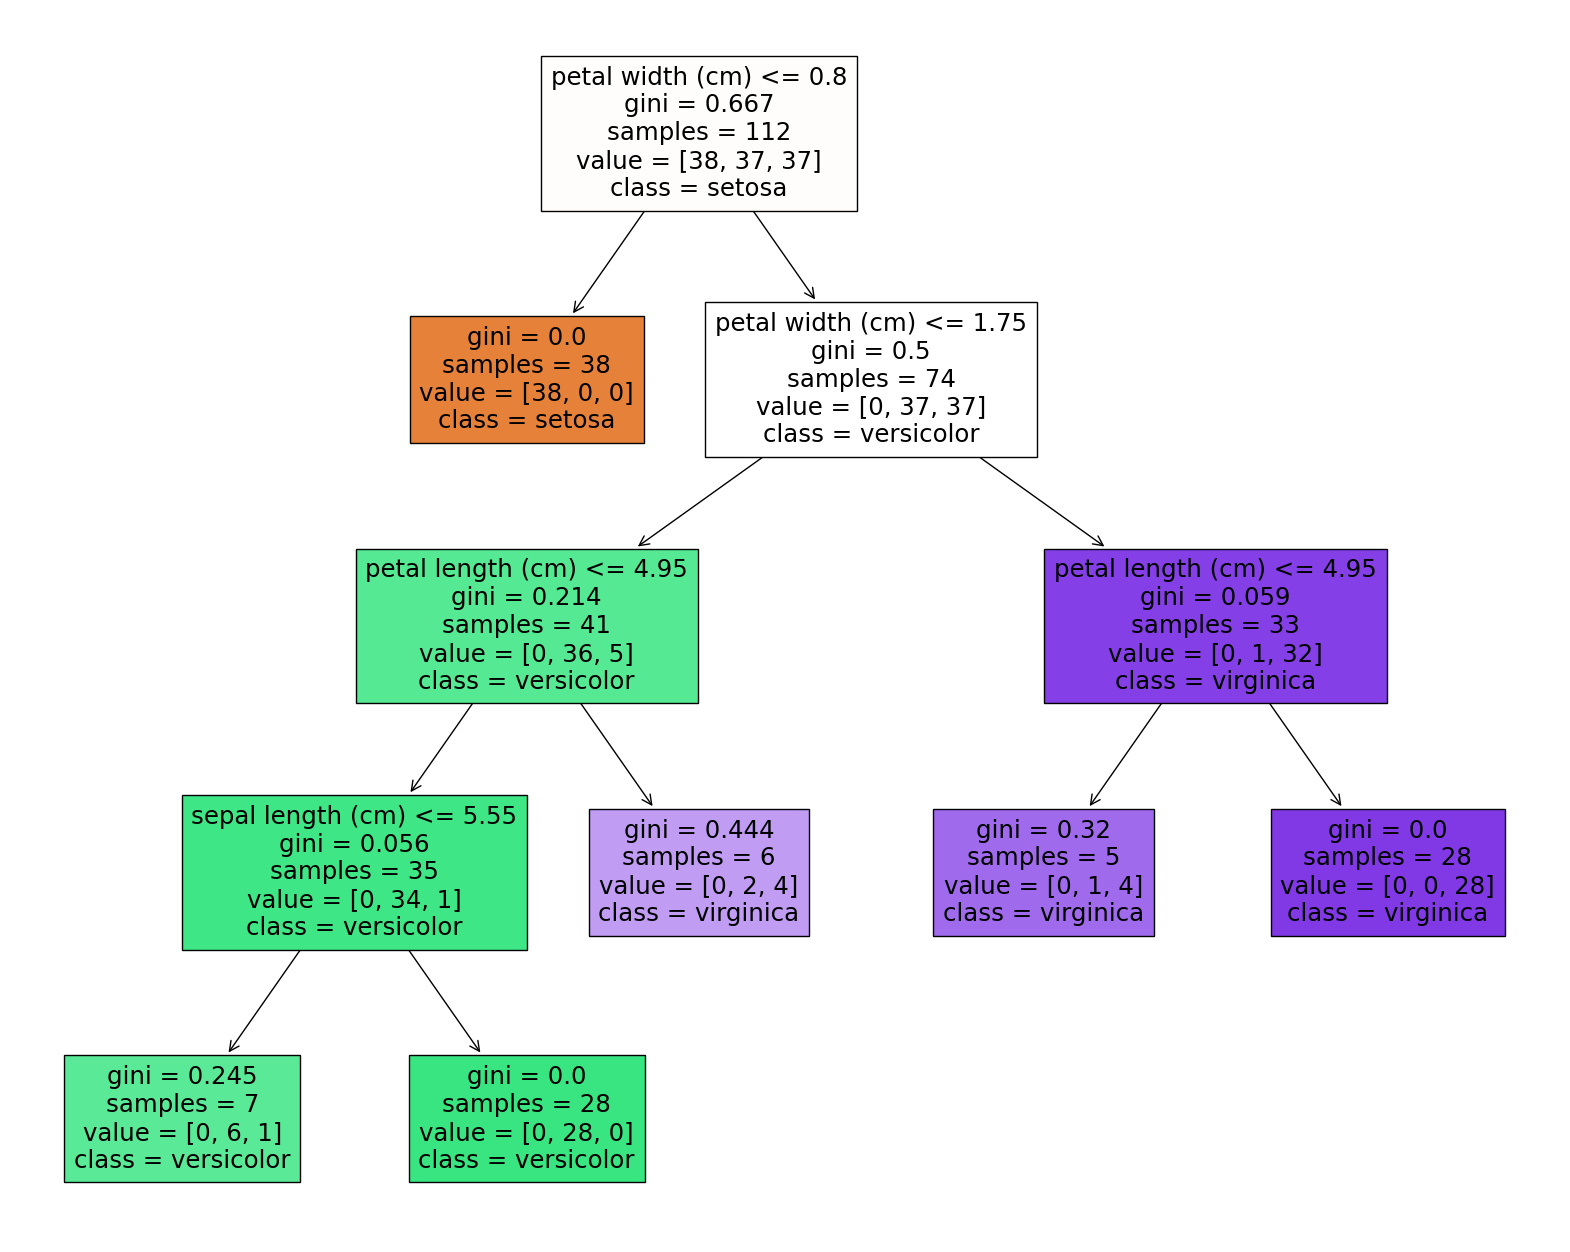

In [223]:
plt.figure(figsize=(20,16))
plot_tree(model_dtc, filled=True, feature_names=feature_names, class_names=iris['target_names'])
plt.show()

gini계수: 불순도를 의미하며, 계수가 높을 수록 엔트로피가 큼.  
엔트로피가 크다는 의미는 클래스가 혼잡하게 섞여 있다는 뜻임.

<Axes: >

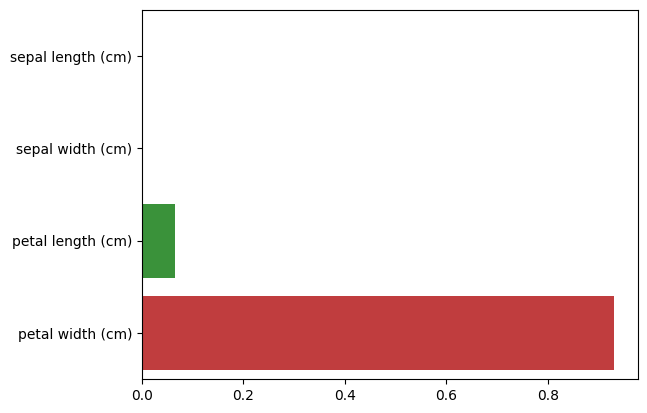

In [224]:
sns.barplot(x=model_dtc.feature_importances_, y=iris.feature_names)

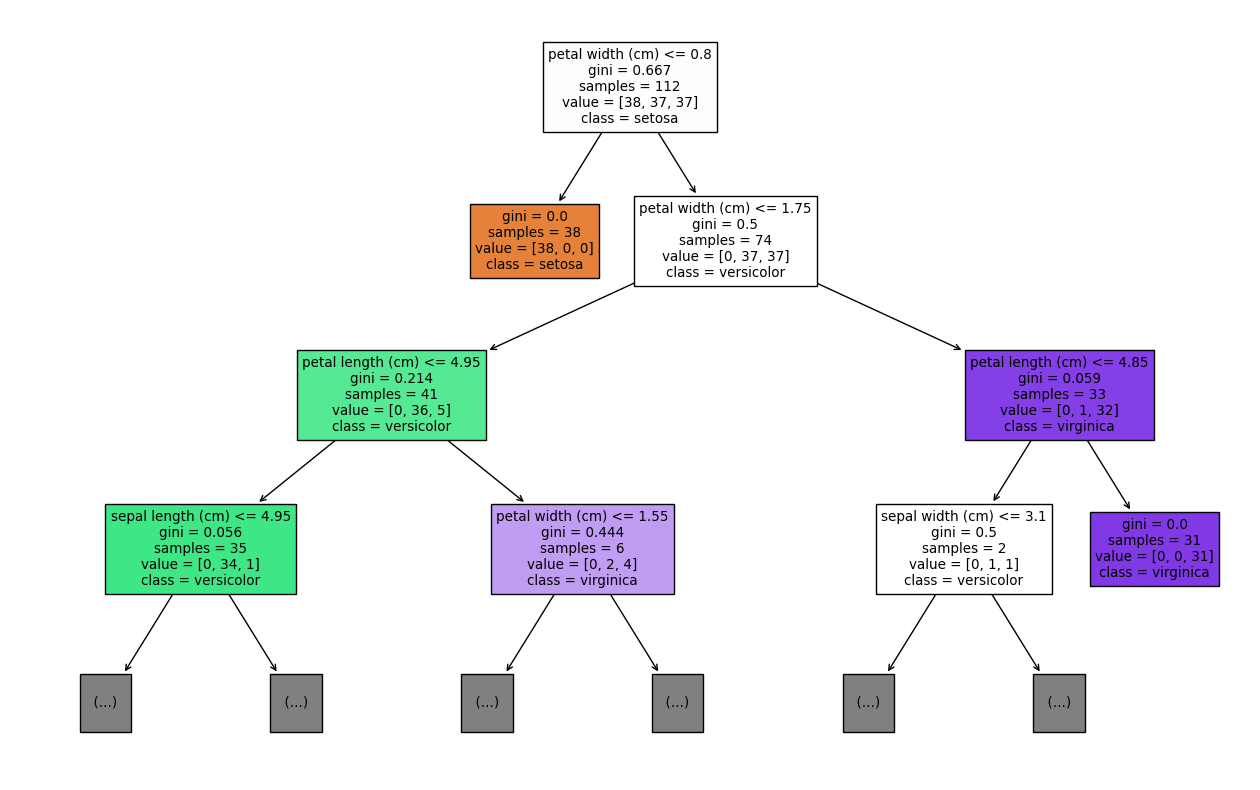

In [193]:
# max_depth=3으로 설정
plt.figure(figsize=(16,10))
plot_tree(model_dtc, max_depth=3, filled=True, feature_names=feature_names, class_names=iris['target_names'])
plt.show()

<Axes: >

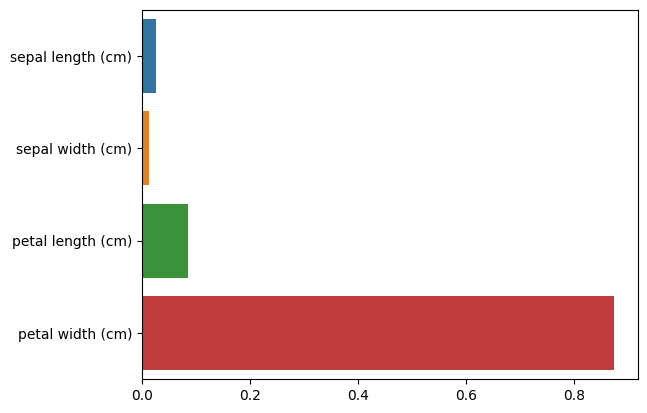

In [194]:
sns.barplot(x=model_dtc.feature_importances_, y=iris.feature_names)

## 결정 트리 학습기의 하이퍼 파라미터 설정하여 모델 학습

In [228]:
model_dtc = DecisionTreeClassifier(random_state=0, min_samples_leaf=7)
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=7, random_state=0)

## [문제] decision tree로 다음의 하이퍼 파리메터를 설정하고 학습
- min_samples_split=4
- min_samples_leaf=4
- max_depth = ?

In [232]:
# 모델 만들고, 테스트, 성능평가
model_dtc = DecisionTreeClassifier(random_state=0, min_samples_leaf=4)
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



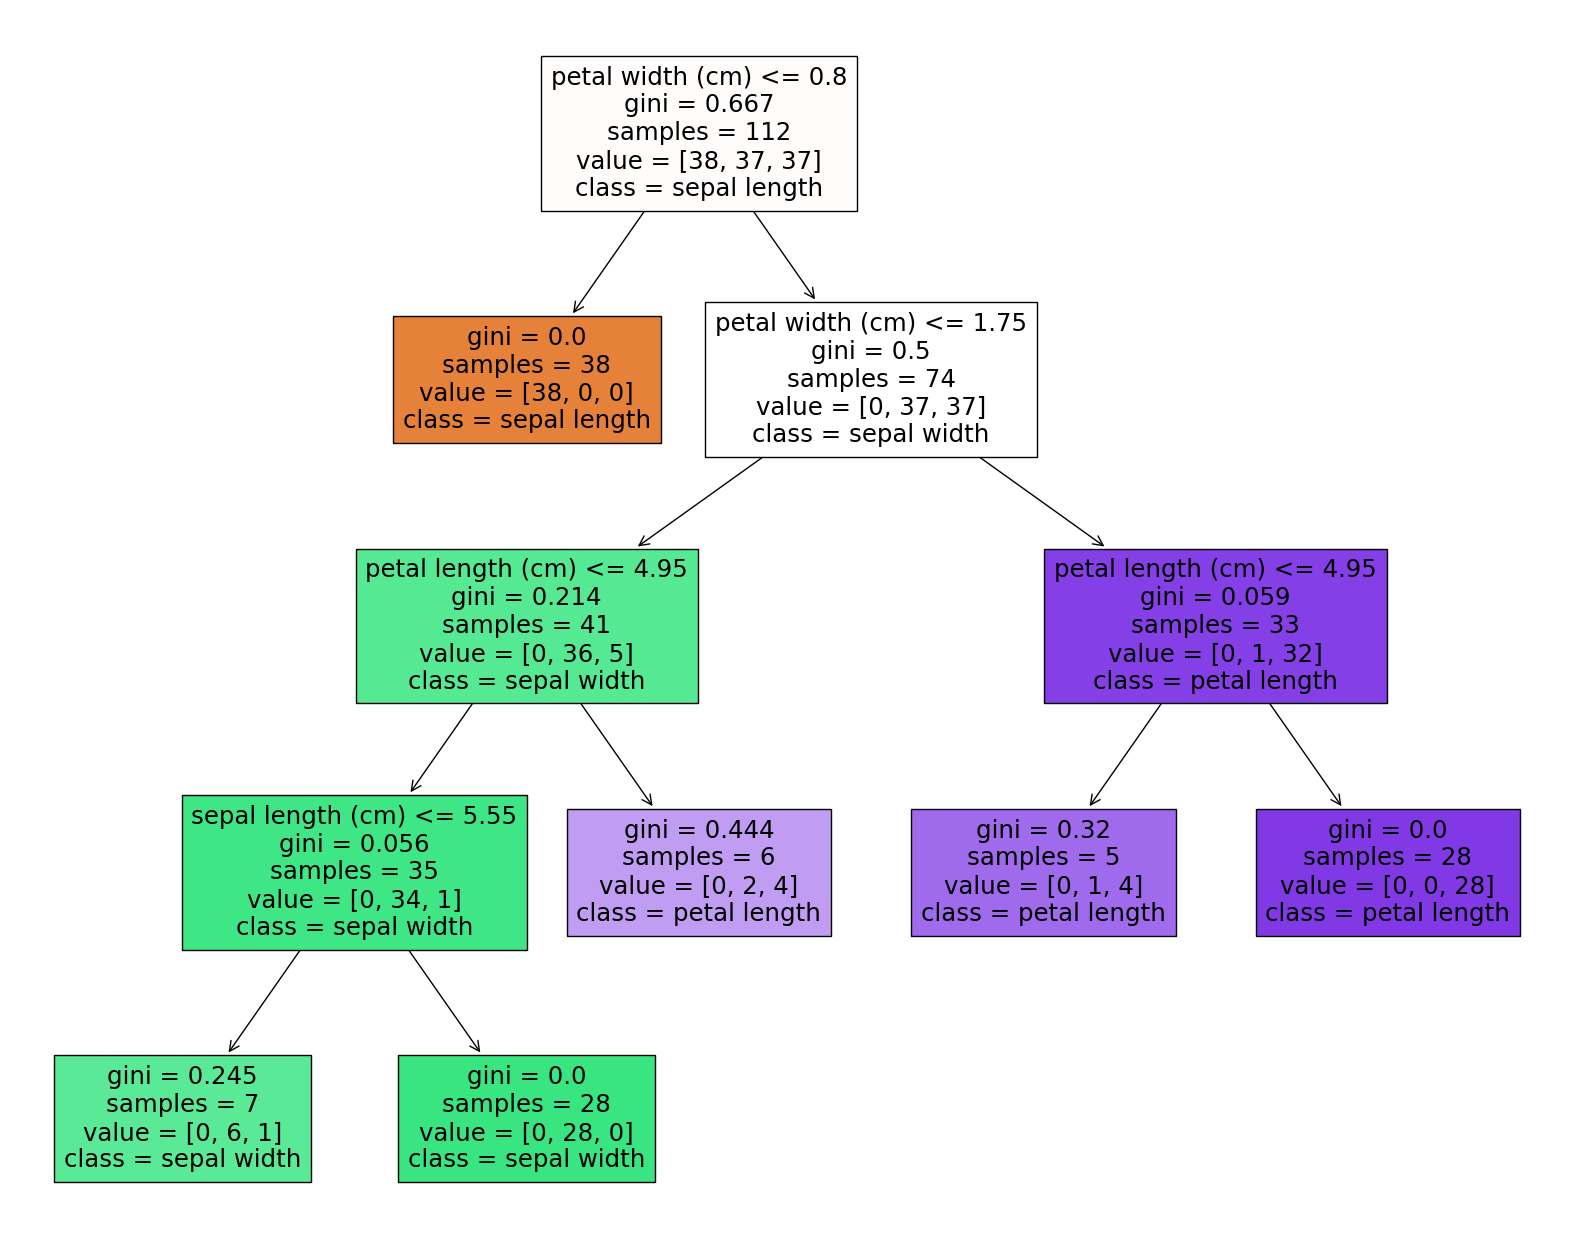

In [233]:
plt.figure(figsize=(20,16))
plot_tree(model_dtc, filled=True, feature_names=feature_names, class_names=cols_list)
plt.show()

In [235]:
model_dtc = DecisionTreeClassifier(random_state=0, min_samples_split=7)
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



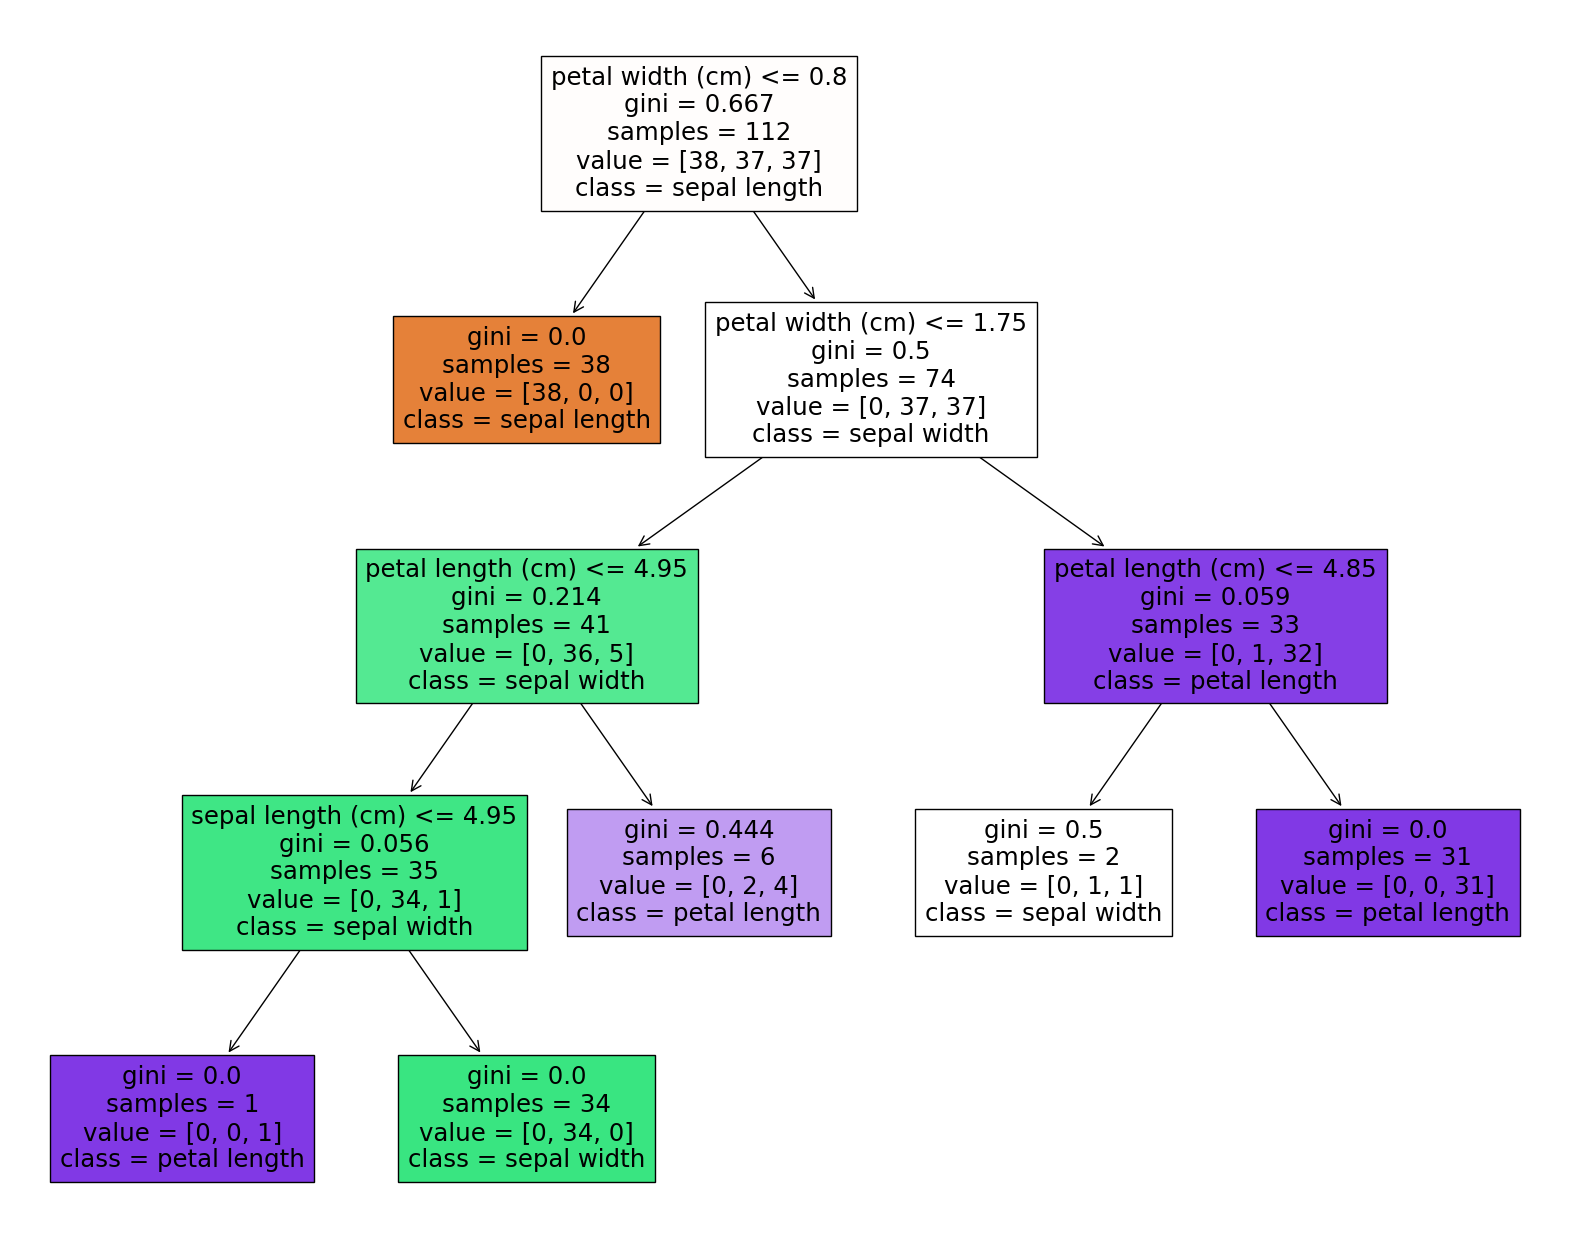

In [236]:
plt.figure(figsize=(20,16))
plot_tree(model_dtc, filled=True, feature_names=feature_names, class_names=cols_list)
plt.show()

In [237]:
model_dtc = DecisionTreeClassifier(random_state=0, min_samples_leaf=4, min_samples_split=7)
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



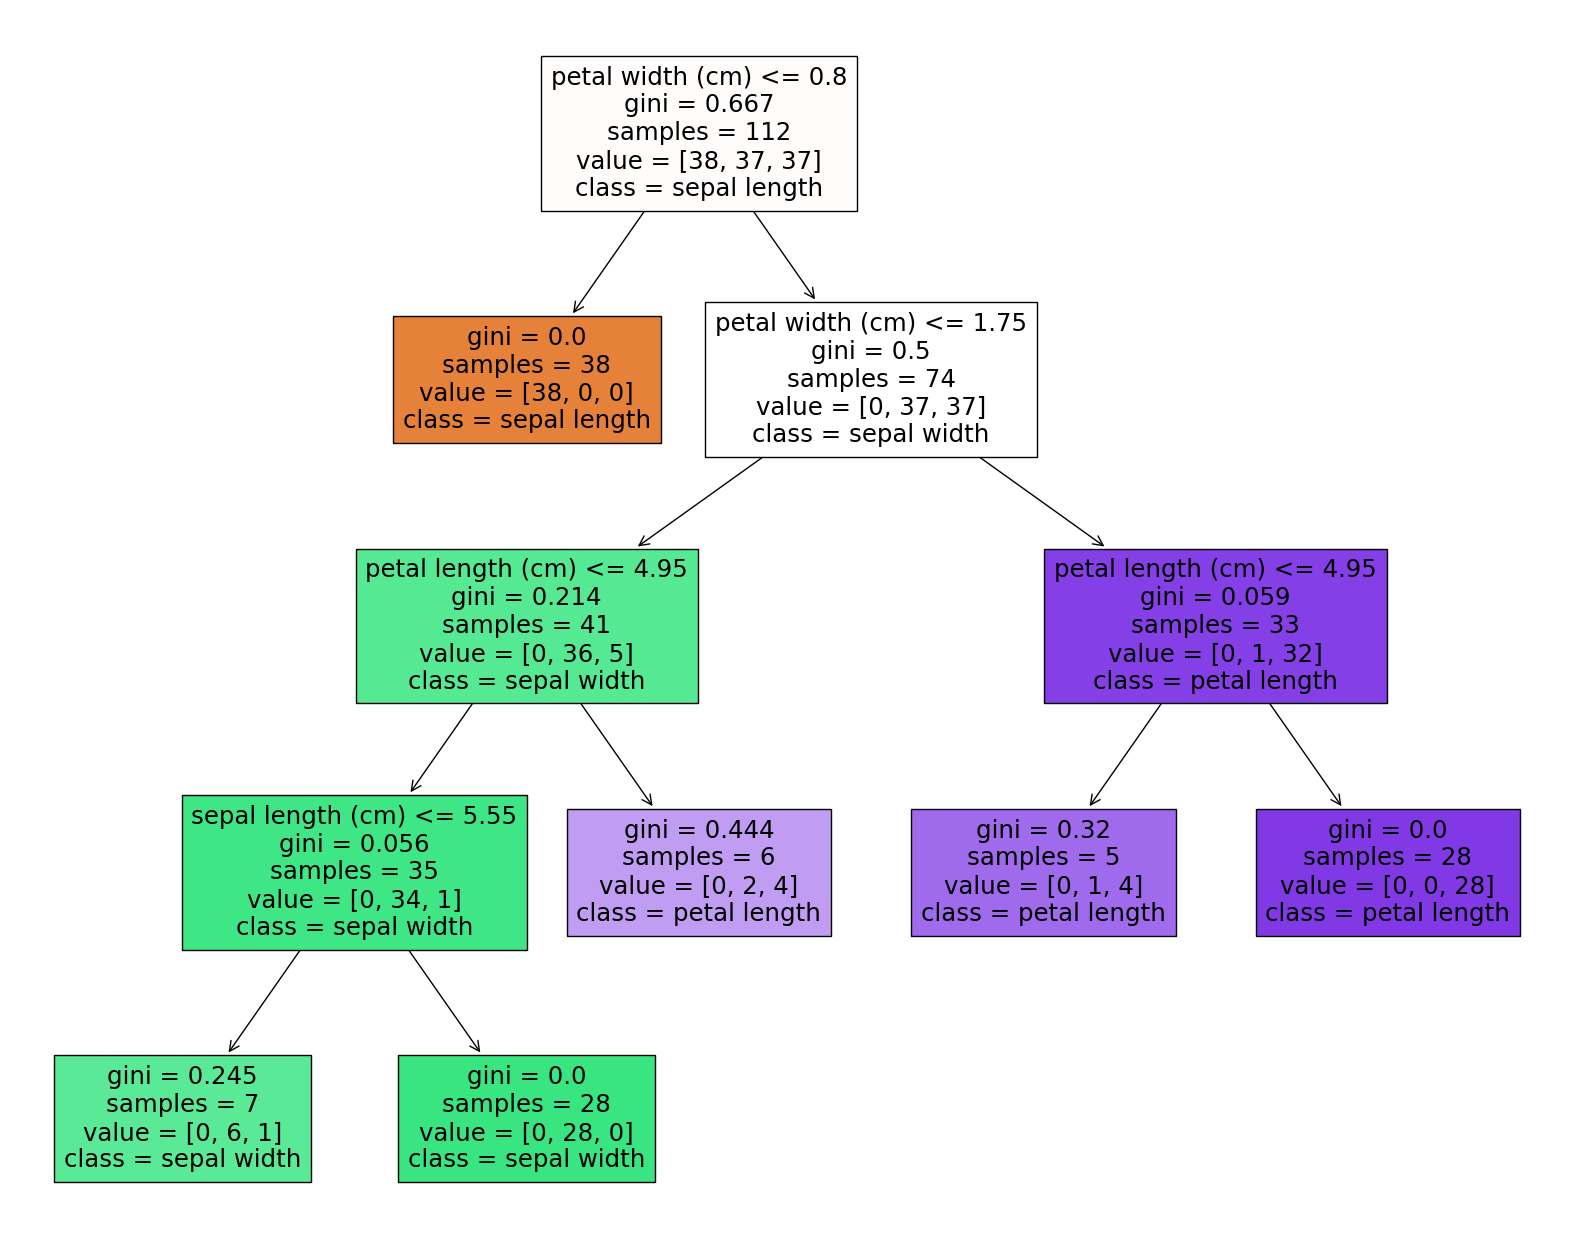

In [238]:
plt.figure(figsize=(20,16))
plot_tree(model_dtc, filled=True, feature_names=feature_names, class_names=cols_list)
plt.show()

In [239]:
model_dtc = DecisionTreeClassifier(random_state=0, max_depth=5)
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



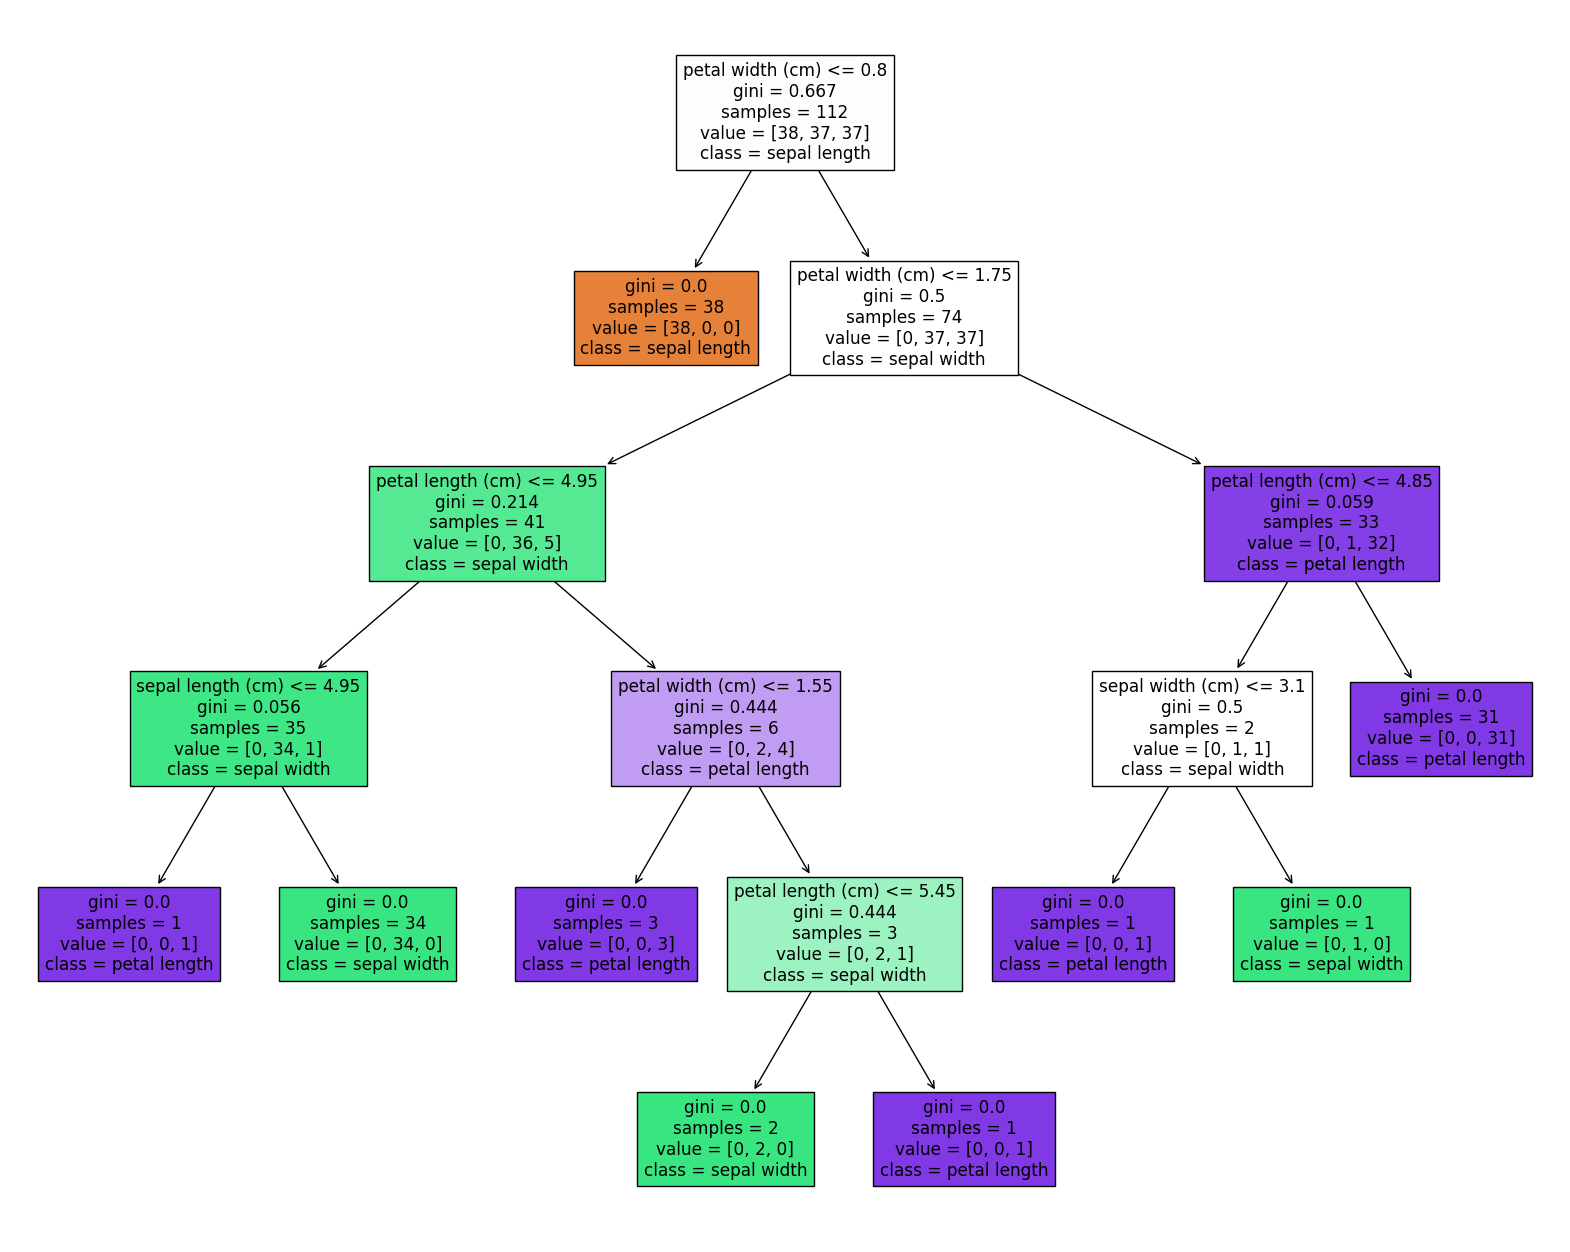

In [240]:
plt.figure(figsize=(20,16))
plot_tree(model_dtc, filled=True, feature_names=feature_names, class_names=cols_list)
plt.show()

In [241]:
model_dtc = DecisionTreeClassifier(random_state=0, min_samples_leaf=4, min_samples_split=7, max_depth=5)
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



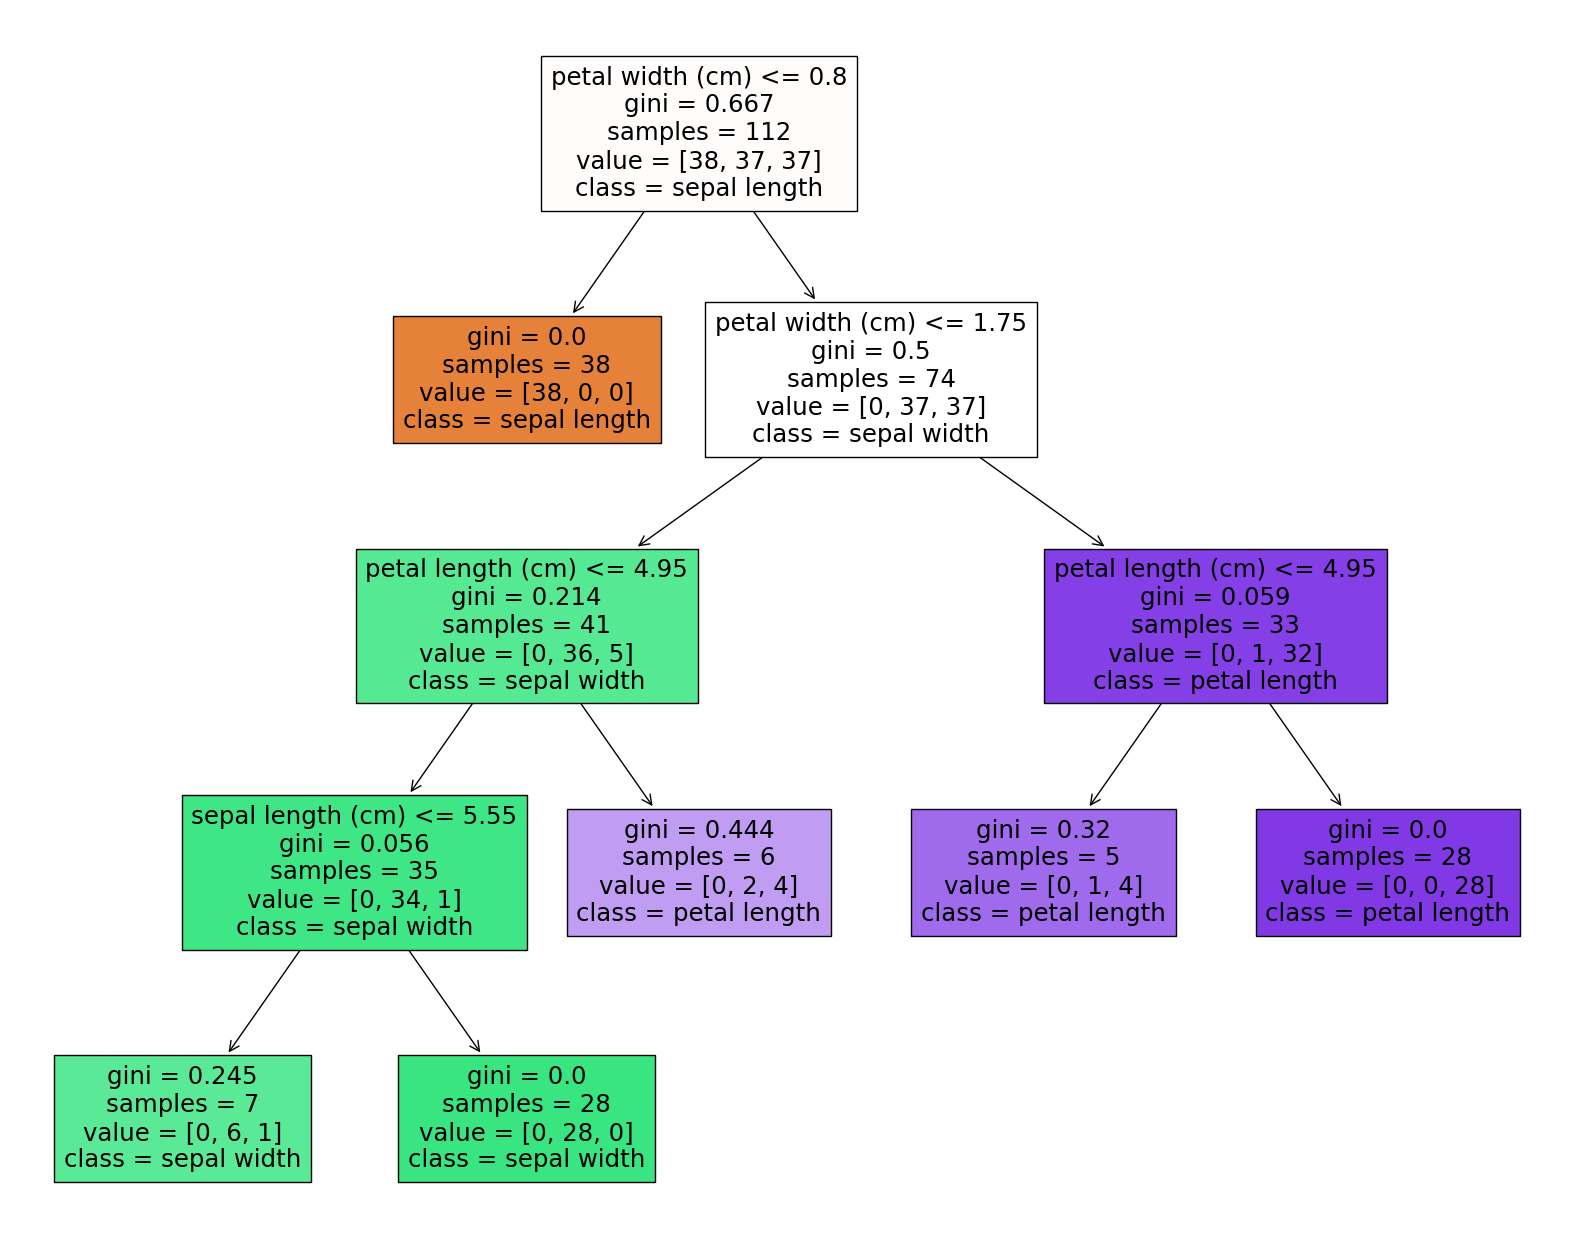

In [242]:
plt.figure(figsize=(20,16))
plot_tree(model_dtc, filled=True, feature_names=feature_names, class_names=cols_list)
plt.show()

In [243]:
model_dtc = DecisionTreeClassifier(random_state=0, min_samples_leaf=4, max_depth=5)
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



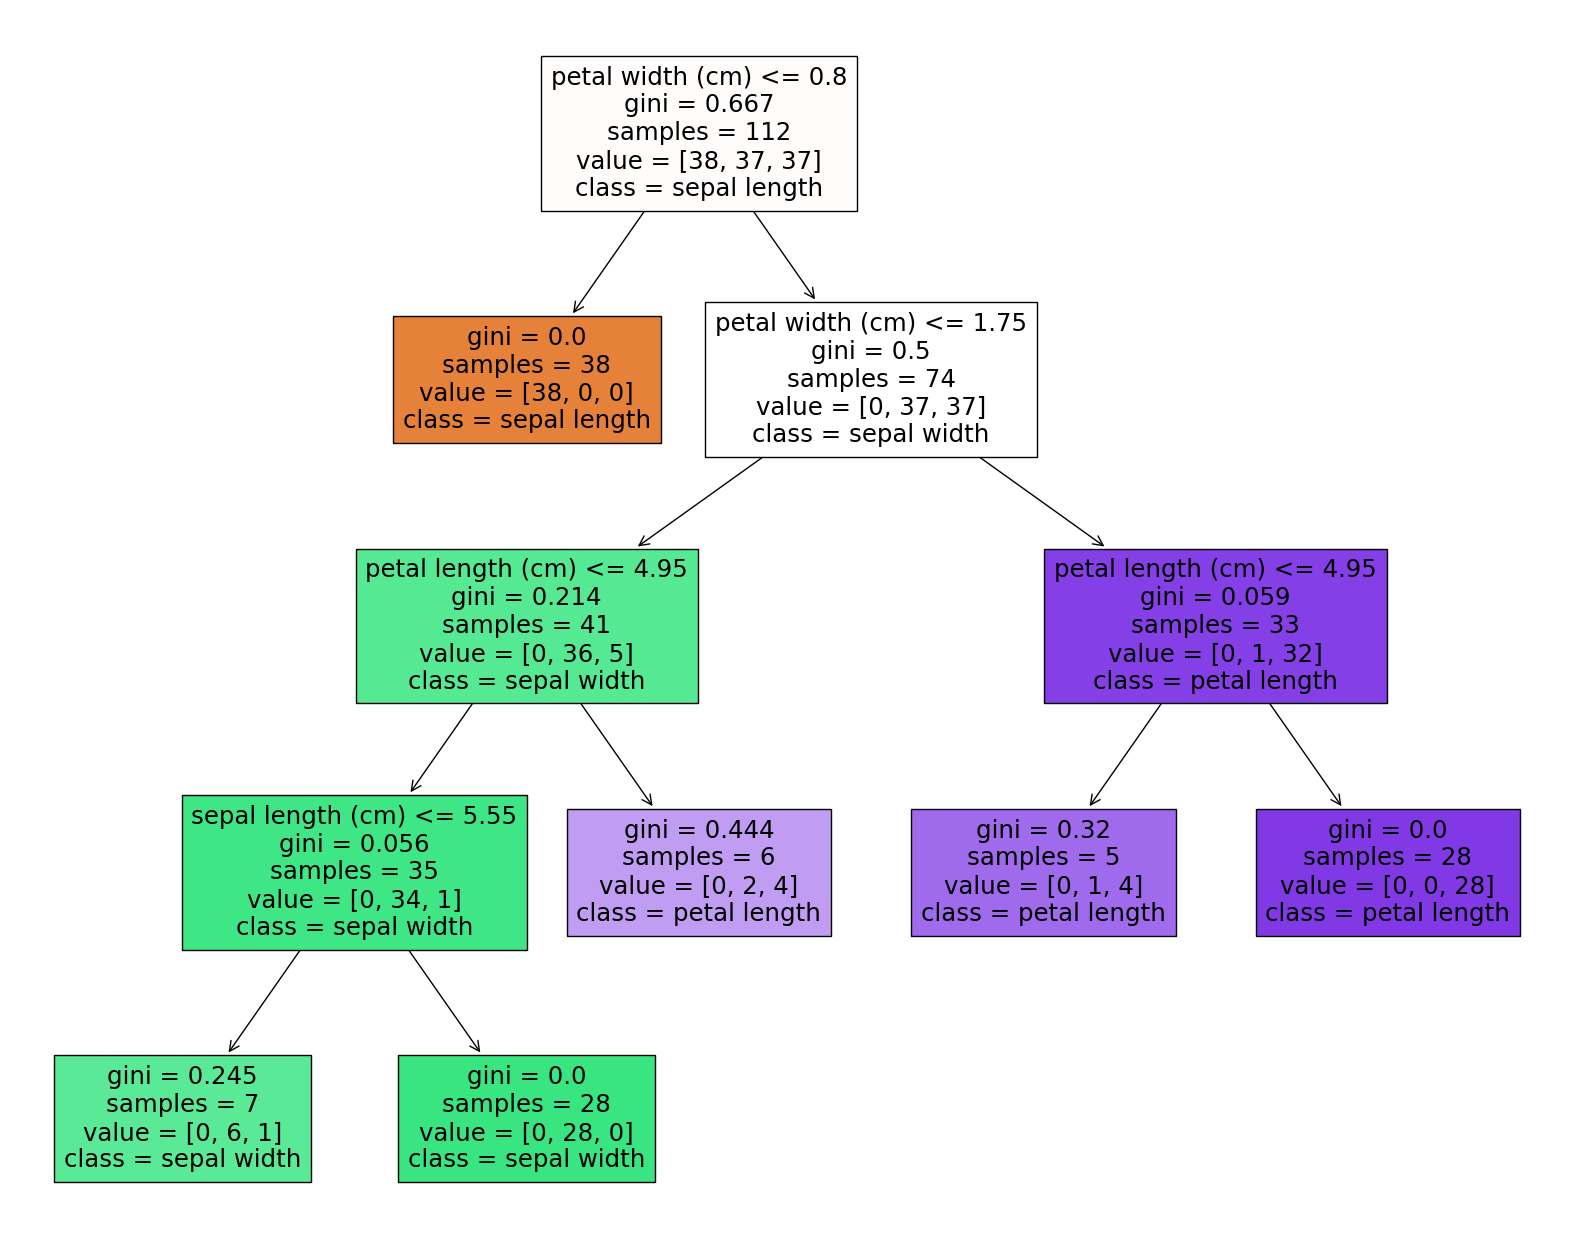

In [244]:
plt.figure(figsize=(20,16))
plot_tree(model_dtc, filled=True, feature_names=feature_names, class_names=cols_list)
plt.show()

In [245]:
model_dtc = DecisionTreeClassifier(random_state=0, min_samples_split=7, max_depth=5)
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



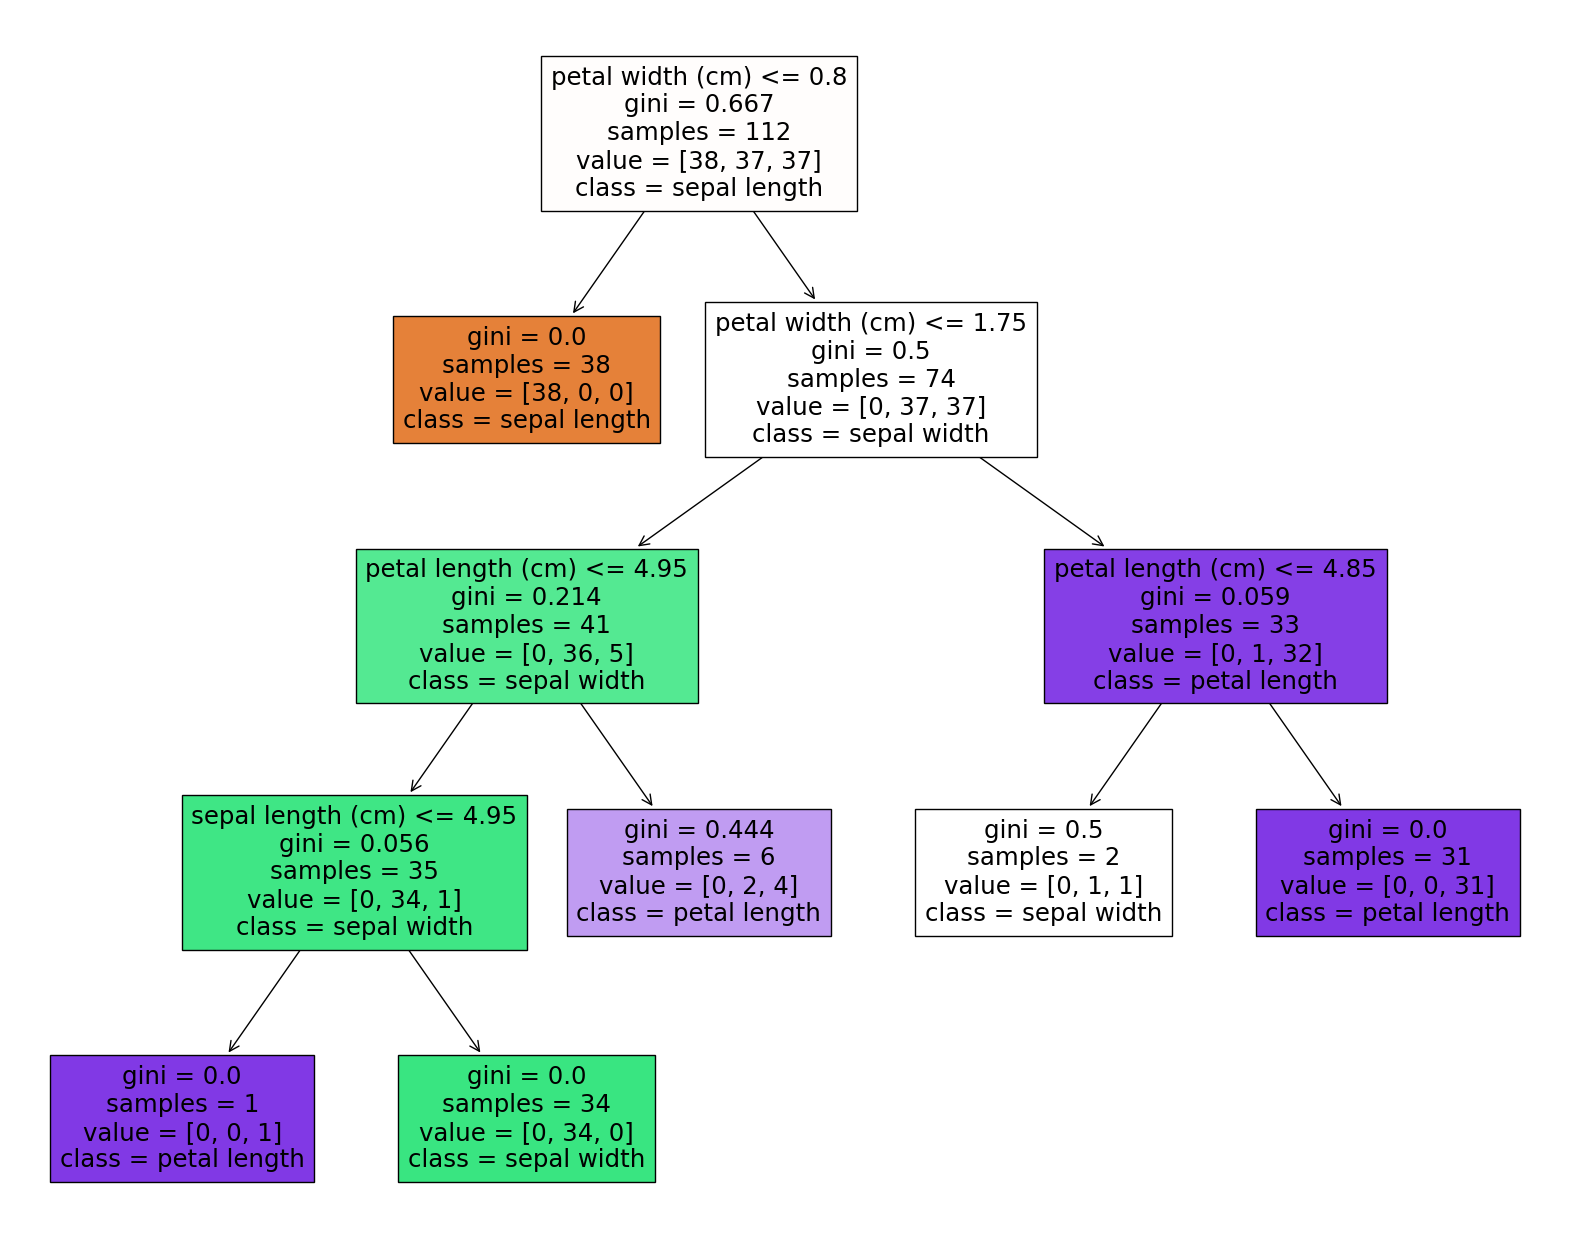

In [246]:
plt.figure(figsize=(20,16))
plot_tree(model_dtc, filled=True, feature_names=feature_names, class_names=cols_list)
plt.show()

## Logistic Regression
[Logistic Regression scikit-learning 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

- 로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년에 제안한 확률 모델
- 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법

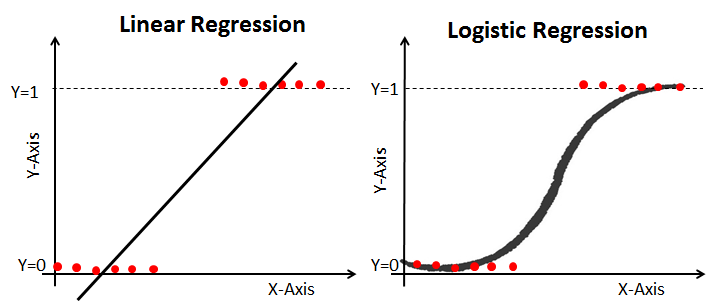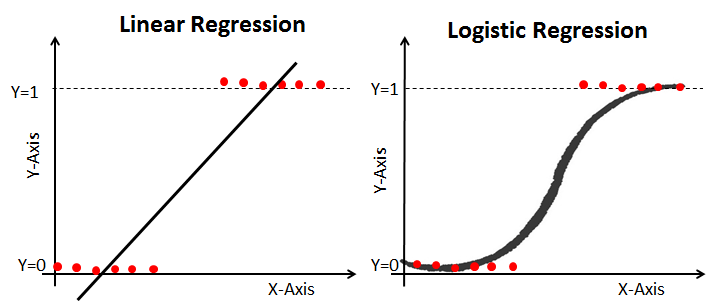

- LogisticRegression, 서포트 벡터 머신 (SVM) 과 같은 알고리즘은 이진 분류만 가능. 즉, 2개의 클래스 판별만 가능함.
- 3개 이상의 클래스에 대한 판별을 진행하는 경우, 다음과 같은 전략으로 판별함.

    - **one-vs-rest (OvR)**: K 개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 클래스를 판별
    - **one-vs-one (OvO)**: 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, 0vs1, 0vs2, 0vs3, ... , 2vs3 까지 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별
    - 일반적으로 **OvsR 전략을 선호** 함.

In [247]:
from sklearn.linear_model import LogisticRegression

### step1 모델 선언

In [248]:
model_lr = LogisticRegression(max_iter=500)

### step2 모델 학습

In [249]:
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

### step3 예측

In [271]:
pred_lr = model_lr.predict(X_test)

In [269]:
model_lr.predict_proba(X_train)

array([[3.11655124e-02, 9.05554597e-01, 6.32798911e-02],
       [3.02534645e-06, 6.74592852e-03, 9.93251046e-01],
       [1.52756091e-05, 4.05436186e-02, 9.59441106e-01],
       [9.55291577e-01, 4.47075545e-02, 8.68912241e-07],
       [6.22608522e-02, 9.24813782e-01, 1.29253656e-02],
       [9.84096565e-01, 1.59033413e-02, 9.38292677e-08],
       [4.65553841e-03, 9.00084600e-01, 9.52598612e-02],
       [4.95497584e-04, 2.95704615e-01, 7.03799887e-01],
       [1.17908102e-02, 4.49272598e-01, 5.38936592e-01],
       [1.66898190e-06, 3.16390035e-02, 9.68359327e-01],
       [9.69266322e-01, 3.07334892e-02, 1.88723439e-07],
       [3.05193765e-02, 9.06108866e-01, 6.33717575e-02],
       [3.13905106e-06, 4.98692926e-02, 9.50127568e-01],
       [1.05929169e-04, 5.26453657e-02, 9.47248705e-01],
       [9.83774151e-01, 1.62258127e-02, 3.68303073e-08],
       [1.37839461e-04, 1.85737455e-01, 8.14124705e-01],
       [1.72821855e-02, 6.83952566e-01, 2.98765249e-01],
       [2.66764209e-03, 8.70466

In [275]:
pred_lr[:10]

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1])

In [276]:
y_test[:10]

139    2
125    2
67     1
3      0
113    2
52     1
18     0
137    2
20     0
64     1
Name: target, dtype: int32

### step4 평가

In [311]:
(pred_lr == y_test).mean()

1.0

In [278]:
model_lr.score(X_train, y_train)

0.9821428571428571

['setosa' 'versicolor' 'virginica']


<Axes: xlabel='sepal length', ylabel='sepal width'>

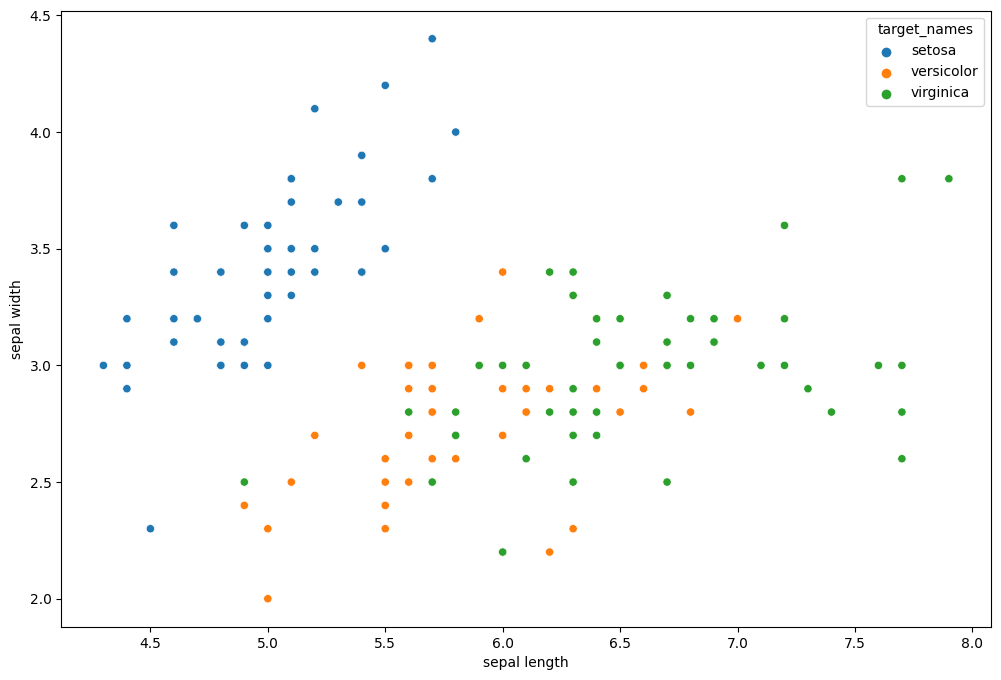

In [330]:
plt.figure(figsize=(12, 8))
print(target_names)
sns.scatterplot(data=df_iris, x = "sepal length", y="sepal width", hue="target_names")
# plt.plot()

In [254]:
from sklearn.metrics import classification_report

In [310]:
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_lr))

model_dtc = DecisionTreeClassifier(random_state=0, min_samples_split=7, max_depth=5)
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



In [291]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [309]:
import numpy as np

test_data = [[20, 45, 6, 7],[10, 11, 17, 14], [77, 13, 25, 18]]
print(test_data, type(test_data))
test_data2 = np.random.rand(1, 4)
print(test_data2)
sample = scaler.fit_transform(test_data)
sample2 = scaler.fit_transform(test_data2)
print(model_lr.predict(sample))
print(model_lr.predict(sample2))


[[20, 45, 6, 7], [10, 11, 17, 14], [77, 13, 25, 18]] <class 'list'>
[[0.42125    0.21264281 0.76002597 0.55181133]]
[0 0 0]
[0]


C:\playdata_lab\ml_ex\ml_venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\playdata_lab\ml_ex\ml_venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### 로지스틱 회귀란?
회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘
로지스틱 회귀는 선형 회귀에 대한 개념을 익혀야 한다.
선형 회귀란?
머신 러닝의 가장 큰 목적은 실제 데이터를 바탕으로 모델을 생성해서 만약 다른 입력 값을 넣었을 때 발생할 아웃풋을 예측하는 데에 있다
이때 우리가 찾아낼 수 있는 가장 직관적이고 간단한 모델은 선(line)
데이터를 놓고 그걸 가장 잘 설명할 수 있는 선을 찾아 분석하는 방법을 선형 회귀 분석이라 부른다

로지스틱 회귀 모델의 목표는 로지스틱 함수를 구성하는 계수와 절편에 대해 Log Loss(로그 손실)을 최소화 하는 값을 찾는 것


#### GridSearchCV 수행 최적의 하이퍼 파라메터 찾기

In [256]:
from sklearn.model_selection import GridSearchCV

In [257]:
# 파라메터 후보
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

In [260]:
model_lr_g = LogisticRegression()
print(model_lr_g)

LogisticRegression()


In [261]:
# 그리드 서치 진행
grid_search = GridSearchCV(model_lr_g, param_grid=param_grid,
                        cv=5, refit=True,return_train_score=True)
print(grid_search)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             return_train_score=True)


In [263]:
# GridSearchCV 인자설명
# cv = 하나의 파라미터 쌍으로 모델링할 때 train, test 교차검증을 7번실시하겠다는 뜻
# refit=True : GridSearch한 후 가장 최고로 좋은 파라미터로 학습시켜 놓겠다.
# ㄴ> 이것 때문에 애초에 GridSearchCV 적용한 객체만으로 최적의 파라미터 적용된 모델로드 가능

# 최종 모델 성능 점검
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [265]:
grid_search.fit(X_train, y_train)
# grid_search.score(X_test, y_test)
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df

C:\playdata_lab\ml_ex\ml_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\playdata_lab\ml_ex\ml_venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000798,0.000399,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.006183,0.000399,0.001796,0.000746,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.695652,0.826087,0.818182,...,0.786166,0.085803,6,0.764045,0.741573,0.766667,0.677778,0.911111,0.772235,0.076481
2,0.000998,0.000002,0.000000,0.000000,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.006777,0.000737,0.001595,0.000488,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.869565,0.913043,0.863636,...,0.847431,0.047945,5,0.876404,0.865169,0.877778,0.844444,0.900000,0.872759,0.018110
4,0.000399,0.000488,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.009763,0.001314,0.001001,0.000009,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.869565,1.000000,0.909091,...,0.937549,0.044519,4,0.943820,0.932584,0.966667,0.944444,0.955556,0.948614,0.011588
6,0.000000,0.000000,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.014159,0.001716,0.001191,0.000391,1,l2,"{'C': 1, 'penalty': 'l2'}",0.913043,1.000000,0.909091,...,0.955336,0.039794,1,0.966292,0.955056,0.966667,0.955556,0.977778,0.964270,0.008404
8,0.000804,0.000402,0.000000,0.000000,10,l1,"{'C': 10, 'penalty': 'l1'}",NaN,NaN,NaN,...,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.014754,0.000396,0.001599,0.000490,10,l2,"{'C': 10, 'penalty': 'l2'}",0.913043,1.000000,0.909091,...,0.955336,0.039794,1,0.977528,0.988764,0.988889,0.977778,0.988889,0.984370,0.005485


In [266]:
print(grid_search.best_params_)

{'C': 1, 'penalty': 'l2'}


### SGDClassifier
stochastic gradient descent (SGD) : 확률적 경사 하강법  
[SGDClassifier scikit-learn 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

<img src="https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png">

In [331]:
from sklearn.linear_model import SGDClassifier

### step1 모델 선언

In [332]:
model_sgd = SGDClassifier()

### step2 모델 학습

In [333]:
model_sgd.fit(X_train, y_train)

SGDClassifier()

### step3 예측

In [334]:
pred_sgd = model_sgd.predict(X_test)
pred_sgd

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1])

### step4 평가

In [335]:
(pred_sgd == y_test).mean()

0.868421052631579

In [336]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       0.80      0.73      0.76        11
           2       1.00      0.82      0.90        11

    accuracy                           0.87        38
   macro avg       0.88      0.85      0.86        38
weighted avg       0.88      0.87      0.87        38



### 하이퍼 파라미터 (hyper-parameter) 튜닝
알고리즘 마다 hyper-parameter의 종류가 조금씩 다름.

문서를 보고 적절한 가설을 세운 다음 적용하면서 적합한 옵션과 값을 찾아야함.
자동으로 찾는 방법은 나중에 학습 예정

- penalty : overfitting을 방지하기 위한 옵션(l1, l2, elasticnet)
- random_state : 하이퍼 파라미터 튜닝시, 고정할 것
- n_jobs=-1 : CPU가 여러개 일경우 모두 사용 (학습속도가 빠름)

[hyper-parameter 튜닝 참조](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [337]:
#model_sgd = SGDClassifier(penalty='elasticnet', random_state=20, n_jobs=-1) #규제 : overfit 방지하는 옵션
model_sgd = SGDClassifier(penalty='l1', random_state=20, n_jobs=-1) #규제 : overfit 방지하는 옵션
model_sgd

SGDClassifier(n_jobs=-1, penalty='l1', random_state=20)

In [338]:
model_sgd.fit(X_train, y_train)

SGDClassifier(n_jobs=-1, penalty='l1', random_state=20)

In [339]:
pred_sgd = model_sgd.predict(X_test)

In [340]:
pred_sgd[:10]

array([2, 2, 1, 0, 2, 2, 0, 2, 0, 0])

In [341]:
y_test[:10].to_numpy()

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1])

In [342]:
(pred_sgd == y_test).mean()

0.8157894736842105

In [343]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.36      0.53        11
           2       0.65      1.00      0.79        11

    accuracy                           0.82        38
   macro avg       0.86      0.79      0.76        38
weighted avg       0.87      0.82      0.79        38



### KNeighborsClassifier
최근접 이웃 알고리즘

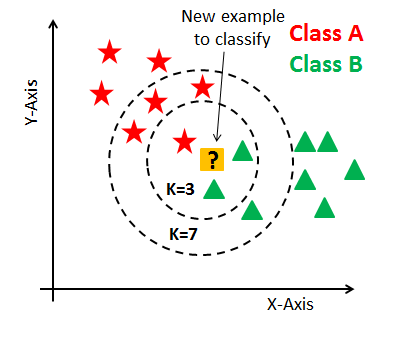

In [344]:
from IPython.display import Image
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [345]:
from sklearn.neighbors import KNeighborsClassifier

In [346]:
model_knc = KNeighborsClassifier()
model_knc  # n_neighbors=5 일반적으로 홀수 값으로 설정

KNeighborsClassifier()

In [347]:
model_knc.fit(X_train, y_train)

KNeighborsClassifier()

In [348]:
pred_knc = model_knc.predict(X_test)

In [349]:
(pred_knc == y_test).mean()

1.0

In [350]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_knc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



hyper-parameter 튜닝해서 실습해 보기

In [351]:
model_knc = KNeighborsClassifier(n_neighbors=7, leaf_size=20)
model_knc.fit(X_train, y_train)
knc_pred = model_knc.predict(X_test)
print(y_test.values)
print(knc_pred)

[2 2 1 0 2 1 0 2 0 1 1 0 2 0 0 2 1 1 2 0 2 0 0 0 2 0 0 2 1 1 0 1 0 2 0 0 1
 1]
[2 2 1 0 2 1 0 2 0 1 1 0 2 0 0 2 1 1 2 0 2 0 0 0 2 0 0 2 1 1 0 1 0 2 0 0 1
 1]


In [352]:
(knc_pred == y_test).mean()

1.0

## 서포트 벡터 머신 (SVM; Support Vector Machine)
- (SVC; Support Vector Classifier)
- 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.
- 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.

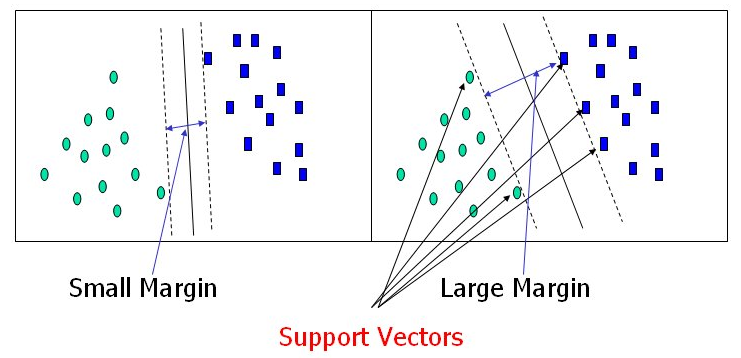

In [353]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

이진 분류만 가능함.(2개의 클래스 판별)

- OvsR 전략 사용
- hyperparameter 옵션
- [SVM scikit-learn 문서 참조](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [354]:
from sklearn.svm import SVC

In [355]:
model_svc = SVC(kernel="linear", C=10)
model_svc

SVC(C=10, kernel='linear')

In [356]:
model_svc.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [357]:
pred_svc = model_svc.predict(X_test)

In [358]:
pred_svc

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1])

In [359]:
(pred_svc == y_test).mean()

0.9736842105263158

In [360]:
pred_svc[:5]

array([2, 2, 1, 0, 2])

In [361]:
from sklearn.metrics import classification_report
# Predict를 수행하고 classification_report() 결과 출력
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



각 클래스(target 값)에 대한 확률값을 return 해주는 decision_function()

In [362]:
# 클래스를 분류한 확률 정보 확인
model_svc.decision_function(X_test)[:5]

array([[-0.2791335 ,  1.21082433,  2.25807507],
       [-0.284271  ,  1.22102802,  2.26426272],
       [-0.23905147,  2.28742427,  0.73720993],
       [ 2.23590712,  1.30949364, -0.31301269],
       [-0.27599849,  1.14864805,  2.2667855 ]])

SVC 학습모델의 속성값

- n_support_: 각 클래스의 서포트의 개수
- support_: 각 클래스의 서포트의 인덱스
- support_vectors_: 각 클래스의 서포트의 x 값. x+와 x-
- coef_: w 벡터
- intercept_: −w0
- dual_coef_: 각 원소가 ai⋅yi로 이루어진 벡터